In [42]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Customize figure output
plt.style.use('seaborn')
mpl.rc('font', size=18)
mpl.rc('axes', labelsize='large')
mpl.rc('xtick', labelsize='large')
mpl.rc('ytick', labelsize='large')

plt.rcParams['figure.figsize'] = [20, 10] # For larger plots

In [102]:
df = pd.read_csv('./Data/acceptability_vs_experienced_coord.csv')
df = df.merge(pd.read_csv('./Data/iso_alpha_list.csv'),
              left_on='country', right_on='country',how='left')

In [103]:
df.head()

,country,experienced,acceptability,lat,lon,iso_code
0,Afghanistan,50.8,73.203571,33.939100,67.710000,AFG
1,Angola,33.9,22.640000,-8.838333,13.234444,AGO
2,Armenia,8.1,18.546429,40.069100,45.038200,ARM
3,Azerbaijan,13.5,53.660714,40.143100,47.576900,AZE
4,Bangladesh,53.3,27.814286,23.685000,90.356300,BGD


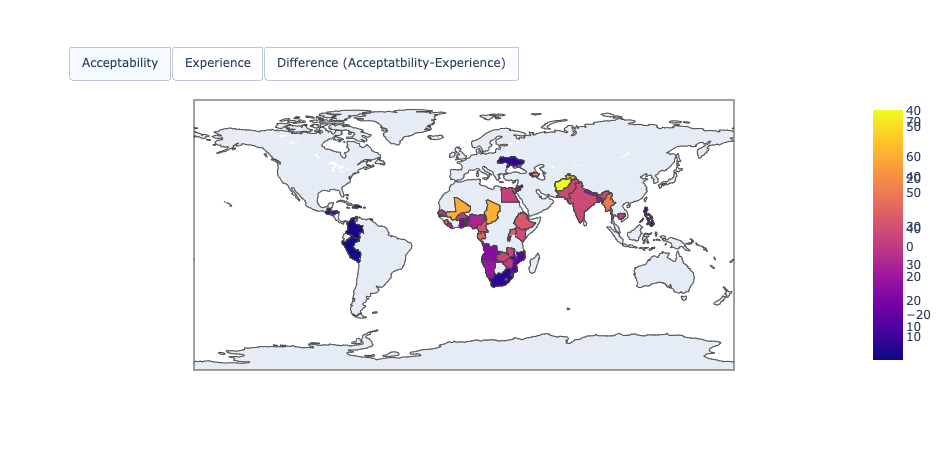

In [169]:
# create figure
fig = go.Figure()
hover_text = 'country: ' + df['country'] + "<br>" + \
              'experience: ' + df['experienced'].astype(str) + ' %<br>' + \
              'acceptability: ' + df['acceptability'].astype(str) + ' %<br>'
            

# Add surface trace


fig.add_trace(go.Choropleth(z=(df['acceptability']-df['experienced']).values.tolist(),
             locations=df['iso_code'].values.tolist(), text=hover_text, hoverinfosrc='text'))

fig.add_trace(go.Choropleth(z=df['experienced'].values.tolist(),
             locations=df['iso_code'].values.tolist(), text=hover_text, hoverinfosrc='text'))

fig.add_trace(go.Choropleth(z=df['acceptability'].values.tolist(),
             locations=df['iso_code'].values.tolist(), text=hover_text, hoverinfosrc='text'))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Acceptability",
                     method="restyle",
                     args = [{'visible': [False, False, True]}]
                    ),
                dict(label="Experience",
                     method="restyle",
                     args=[{'visible': [False, True, False]}]),
                dict(label="Difference (Acceptatbility-Experience)",
                     method="restyle",
                     args = [{'visible': [True, False, False]}]),
                    
            ]),
        showactive=True,)
    ])
fig.show()